# Conversion in Digital Marketing - EDA and Predictive Modeling

# 1. Load Libraries

In [3]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve , accuracy_score

# Others
from collections import Counter

# 2. Load Data

In [4]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


# 3. EDA

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8000   │ │ int32       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID         │   0 │    0 │  12000 │    2310 │    8000 │   10000 │  12000 │  14000 │  16000 │ ▇▇▇▇▇▇ │  │
│ │ Age                │   0 │    0 │  43.63 │    14.9 │      18 │      31 │     43 │     56 │     69 │ ▇▇▇▇▇▇ │  │
│ │ Income             │   0 │    0 │  84660 │   37580 │   20010 │   51740 │  84930 │ 116800 │ 150000 │ ▇▇▇▇▇▇ │  │
│ │ AdSpend            │   0 │    0 │   5001 │    2838 │   100.1 │    2523 │   5013 │   7408 │   9998 │ ▇▇▇▇▇▇ │  │
│ │ ClickThroughRate   │   0 │    0 │ 0.1548 │ 0.08401 │    0.01 │ 0.08263 │ 0.1545 │ 0.2282 │    0.3 │ ▇▇▇▇▇▇ │  │
│ │ ConversionRate     │   0 │    0 │ 0.1044 │ 0.05488 │ 0.01002 │ 0.05641 │  0.104 │ 0.1521 │    0.2 │ ▇▇▇▇▇▇ │  │
│ │ WebsiteVisits      │   0 │    0 │  24.75 │   14.31 │       0 │      13 │     25 │     37 │     49 │ ▇▇▇▇▇▇ │  │
│ │ PagesPerVisit      │   0 │    0 │  5.549 │   2.607 │       1 │   3.302 │  5.534 │  7.836 │  9.999 │ ▇▇▇▇▇▇ │  │
│ │ TimeOnSite         │   0 │    0 │  7.728 │   4.228 │  0.5017 │   4.068 │  7.683 │  11.48 │     15 │ ▇▇▇▇▇▇ │  │
│ │ SocialShares       │   0 │    0 │   49.8 │    28.9 │       0 │      25 │     50 │     75 │     99 │ ▇▇▇▇▇▇ │  │
│ │ EmailOpens         │   0 │    0 │  9.477 │   5.711 │       0 │       5 │      9 │     14 │     19 │ ▇▆▇▆▆▇ │  │
│ │ EmailClicks        │   0 │    0 │  4.467 │   2.857 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ PreviousPurchases  │   0 │    0 │  4.486 │   2.888 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ LoyaltyPoints      │   0 │    0 │   2490 │    1430 │       0 │    1255 │   2497 │   3702 │   4999 │ ▇▇▇▇▇▇ │  │
│ │ Conversion         │   0 │    0 │ 0.8765 │   0.329 │       0 │       1 │      1 │      1 │      1 │ ▁    ▇ │  │
│ └────────────────────┴─────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Gender    │  0 │    0 │ Male      │ Female    │ Fema

In [6]:
print("Unique values in the columns : ")
for col in df:
    print(col)
    print(df[col].unique())

Unique values in the columns : 
CustomerID
[ 8000  8001  8002 ... 15997 15998 15999]
Age
[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
Gender
['Female' 'Male']
Income
[136912  41760  88456 ...  24849 125471 107862]
CampaignChannel
['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
CampaignType
['Awareness' 'Retention' 'Conversion' 'Consideration']
AdSpend
[6497.87006842 3898.66860568 1546.4295958  ... 4609.53463542 9476.10635405
 7743.6270702 ]
ClickThroughRate
[0.04391851 0.15572507 0.27749037 ... 0.05652592 0.02396129 0.1856701 ]
ConversionRate
[0.08803141 0.18272468 0.07642272 ... 0.13382612 0.13838618 0.05722808]
WebsiteVisits
[ 0 42  2 47  6 48 13 22 16  8 20 44  1 31  7 35 25 36 14 33 39 21 12 24
 26 11 32 46 23 15 17 37 41 27 34 43 49 19 40 10 38 28  5 29  9 30 18 45
  3  4]
PagesPerVisit
[2.39901653 2.91713775 8.2236191  ... 2.85324058 1.00296447 6.96473936]
TimeOnSite

In [7]:
# Check for any duplicate rows:
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 0


**Discrete Numerical Variables**:
- Age
- WebsiteVisits
- SocialShares
- EmailOpens
- EmailClicks
- PreviousPurchases

**Continuous Numerical Variables**:
- Income
- AdSpend
- ClickThroughRate
- ConversionRate
- PagesPerVisit
- TimeOnSite
- LoyaltyPoints

**Categorical Variables**:
- Gender
- CampaignType
- AdvertisingPlatform
- AdvertisingTool
- `Conversion (Target variable)`

Since `AdvertisingPlatform`, and `AdvertisingTool` are the same for all the datapoints we can drop them.

In [8]:
discrete_variables = ["Age", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases"]
continuous_variables = ["Income", "AdSpend", "ClickThroughRate", "ConversionRate", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
categorical_variables = ["Gender", "CampaignType", "CampaignChannel", "Conversion"]

In [9]:
df.head(3)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1


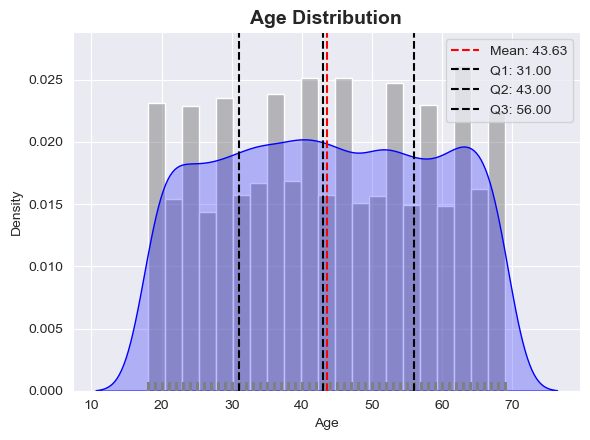

In [10]:
sns.set_style("darkgrid")

# Creating a figure and an axis
fig, ax = plt.subplots(figsize=(6, 4.5))

# Calculating quartiles and mean
q1, q2, q3 = df["Age"].quantile([0.25, 0.5, 0.75])
mean = df["Age"].mean()

# Plotting a histogram with density on y-axis, without filling$$
sns.histplot(data=df, x="Age", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)

# Plotting the KDE (Kernel Density Estimate) with filling$$
sns.kdeplot(data=df["Age"], fill=True, color="blue", ax=ax)

# Adding rug plot
sns.rugplot(data=df["Age"], color="gray", ax=ax)

# Adding vertical lines for mean and quartiles
ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

# Setting plot title and labels
ax.set_title("Age Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Age")
ax.set_ylabel("Density")

# Adding a legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

#### Age Distribution

| Statistic | Value |
|-----------|-------|
| Mean      | 43.63 |
| Q1        | 31.00 |
| Q2 (Median) | 43.00 |
| Q3        | 56.00 |

- Slightly right-skewed distribution
- Wide range from about 20 to 70 years
- Mean close to median, indicating near symmetry
- Interquartile range of 25 years shows significant age diversity
- Multiple peaks suggest different age groups within the population

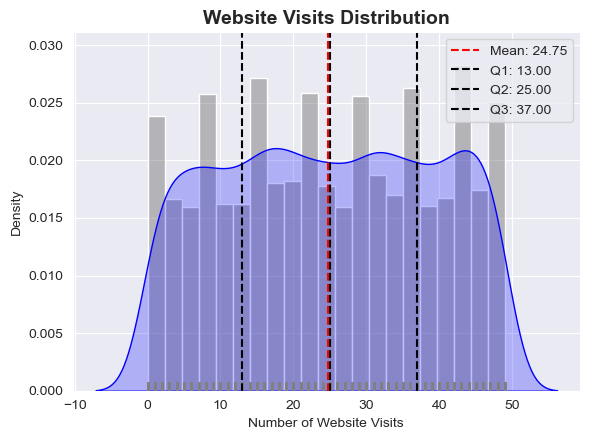

In [11]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["WebsiteVisits"].quantile([0.25, 0.5, 0.75])
mean = df["WebsiteVisits"].mean()

sns.histplot(data=df, x="WebsiteVisits", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["WebsiteVisits"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["WebsiteVisits"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Website Visits Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Website Visits")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### Website Visits Distribution

| Statistic | Value |
|-----------|-------|
| Mean      | 24.75 |
| Q1        | 13.00 |
| Q2 (Median) | 25.00 |
| Q3        | 37.00 |

- Range from 0 to about 50 visits
- Wide spread between Q1 and Q3 indicates variable visit frequency
- Multiple peaks suggest different user engagement patterns


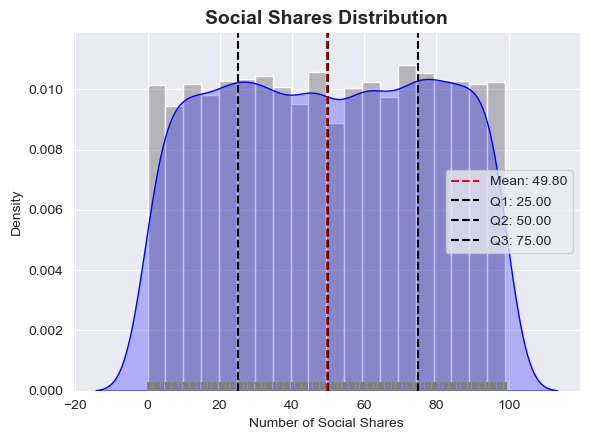

In [12]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["SocialShares"].quantile([0.25, 0.5, 0.75])
mean = df["SocialShares"].mean()

sns.histplot(data=df, x="SocialShares", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["SocialShares"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["SocialShares"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Social Shares Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Social Shares")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### Social Shares Distribution

| Statistic | Value |
|-----------|-------|
| Mean      | 49.80 |
| Q1        | 25.00 |
| Q2 (Median) | 50.00 |
| Q3        | 75.00 |

- Nearly symmetrical distribution
- Range from 0 to about 100 shares
- Mean very close to median, supporting symmetry
- Wide range between Q1 and Q3 shows diverse sharing behaviors
- Relatively flat central distribution suggests uniform sharing patterns among many users

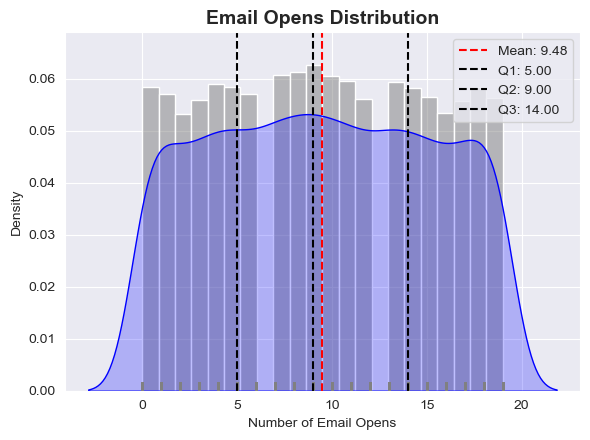

In [13]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["EmailOpens"].quantile([0.25, 0.5, 0.75])
mean = df["EmailOpens"].mean()

sns.histplot(data=df, x="EmailOpens", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["EmailOpens"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["EmailOpens"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Email Opens Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Email Opens")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### Email opens Dist:
- The distribution is slightly right-skewed `(mean > median)`.
- The mean `(9.48)` is higher than the median `(Q2: 9.00)`.
- There's a wide spread of data, with Q1 at 5.00 and Q3 at 14.00.

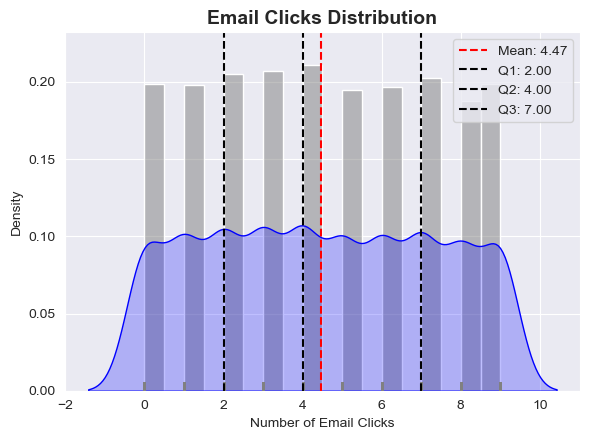

In [14]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["EmailClicks"].quantile([0.25, 0.5, 0.75])
mean = df["EmailClicks"].mean()

sns.histplot(data=df, x="EmailClicks", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["EmailClicks"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["EmailClicks"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Email Clicks Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Email Clicks")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### Email Clicks Dist:
- This distribution is more right-skewed than ```EmailOpens```.
- The mean `(4.47)` is higher than the median `(Q2: 4.00)`.
- The data is concentrated in the lower range, with 75% of the data below 7.00 (Q3).

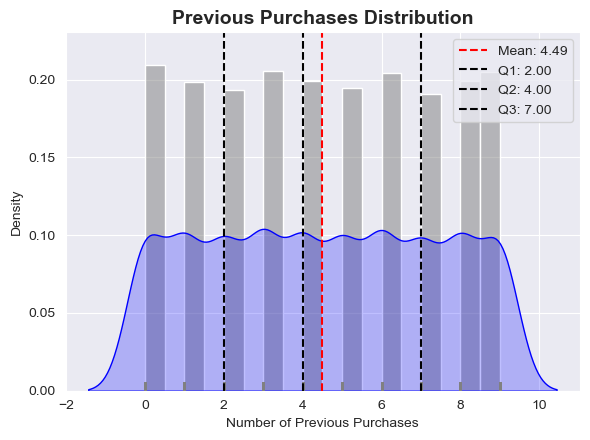

In [15]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["PreviousPurchases"].quantile([0.25, 0.5, 0.75])
mean = df["PreviousPurchases"].mean()

sns.histplot(data=df, x="PreviousPurchases", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["PreviousPurchases"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["PreviousPurchases"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Previous Purchases Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Previous Purchases")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### PreviousPurchases:
- Very similar distribution to EmailClicks.
- Right-skewed with mean `(4.49)` higher than median `(Q2: 4.00)`.
- Most data is concentrated in the lower range.

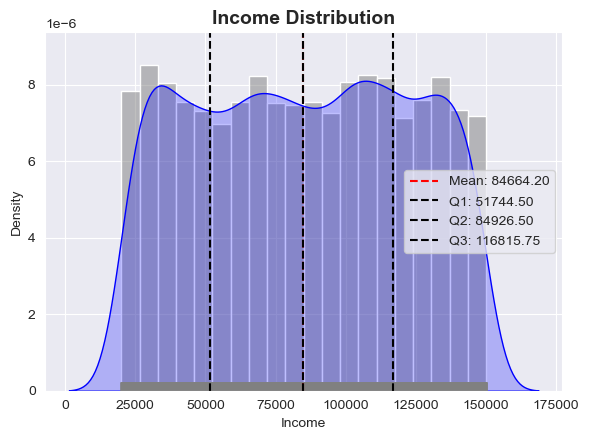

In [16]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["Income"].quantile([0.25, 0.5, 0.75])
mean = df["Income"].mean()

sns.histplot(data=df, x="Income", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["Income"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["Income"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Income Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Income")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### Income:
- Strongly left-skewed distribution.
- Large difference between mean `(84664.20)` and median `(84926.50)`.
- Wide spread of data, with Q3 (116815.75) much higher than Q1 (51744.50).
- Suggests a small number of low-income individuals pulling the mean down.

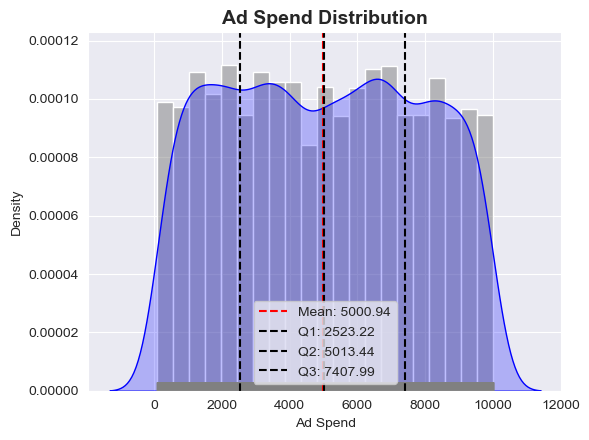

In [17]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["AdSpend"].quantile([0.25, 0.5, 0.75])
mean = df["AdSpend"].mean()

sns.histplot(data=df, x="AdSpend", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["AdSpend"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["AdSpend"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Ad Spend Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Ad Spend")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### AdSpend:
- Slightly left-skewed distribution.
- Mean (5000.94) is close to but slightly below the median `(Q2: 5013.44)`.
- Wide range between Q1 `(2523.22)` and Q3 `(7407.99)`.
- The distribution appears to have multiple peaks, suggesting different tiers of ad spending.

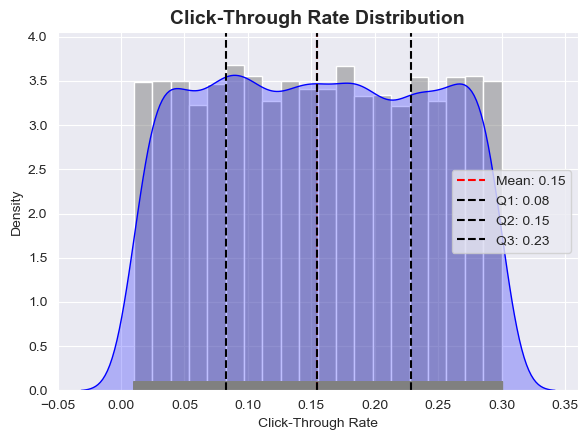

In [18]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["ClickThroughRate"].quantile([0.25, 0.5, 0.75])
mean = df["ClickThroughRate"].mean()

sns.histplot(data=df, x="ClickThroughRate", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["ClickThroughRate"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["ClickThroughRate"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Click-Through Rate Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Click-Through Rate")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### ClickThroughRate:
- Mean (0.15) is equal to the median (Q2: 0.15), suggesting a relatively symmetric distribution.
- The interquartile range (Q3 - Q1) is 0.15, indicating moderate spread in the central 50% of the data.
- The distribution appears to have multiple peaks, suggesting different clusters of click-through rates.

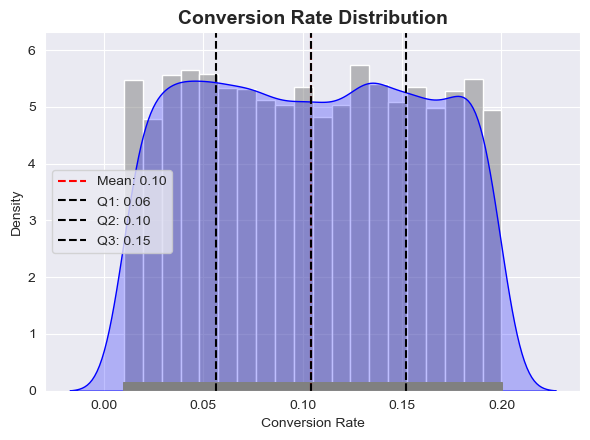

In [19]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["ConversionRate"].quantile([0.25, 0.5, 0.75])
mean = df["ConversionRate"].mean()

sns.histplot(data=df, x="ConversionRate", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["ConversionRate"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["ConversionRate"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Conversion Rate Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Conversion Rate")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### ConversionRate:
- This distribution is also slightly right-skewed.
- The mean `(0.10)` is equal to the median `(Q2: 0.10)`, again suggesting relative symmetry.
- The interquartile range is `0.09`, showing a moderate spread in the central data.
- The distribution appears to have a main peak around `0.10` with a smaller secondary peak around `0.15`.

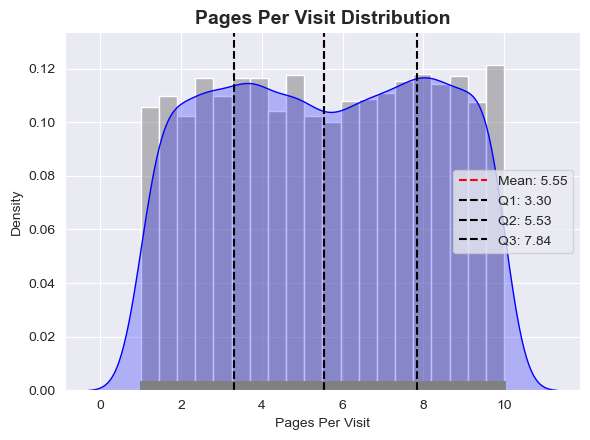

In [20]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["PagesPerVisit"].quantile([0.25, 0.5, 0.75])
mean = df["PagesPerVisit"].mean()

sns.histplot(data=df, x="PagesPerVisit", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["PagesPerVisit"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["PagesPerVisit"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Pages Per Visit Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Pages Per Visit")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### PagesPerVisit:
- The distribution is slightly right-skewed.
- The mean `(5.55)` is very close to the median `(Q2: 5.53)`, indicating near symmetry.
- There's a wide spread of data, with Q1 at `3.30` and Q3 at `7.84`.
- The distribution appears to have multiple peaks, suggesting different typical browsing behaviors.

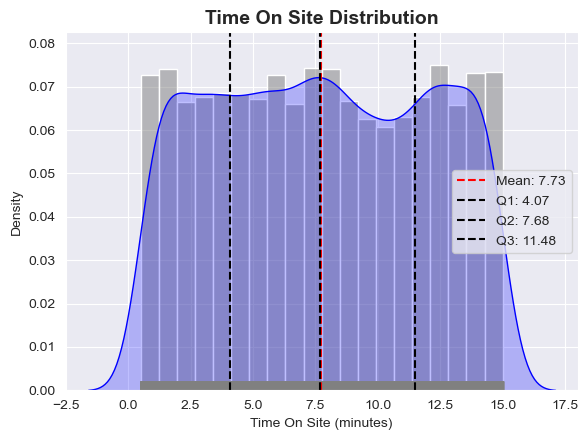

In [21]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["TimeOnSite"].quantile([0.25, 0.5, 0.75])
mean = df["TimeOnSite"].mean()

sns.histplot(data=df, x="TimeOnSite", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["TimeOnSite"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["TimeOnSite"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Time On Site Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Time On Site (minutes)")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### TimeOnSite:
- This distribution shows more pronounced right skew.
- The mean `(7.73)` is slightly higher than the median `(Q2: 7.68)`, confirming the right skew.
- There's a wide spread, with Q1 at `4.07` and Q3 at `11.48`.
- The distribution appears to have a main peak around 7-8 minutes, with a long tail to the right.

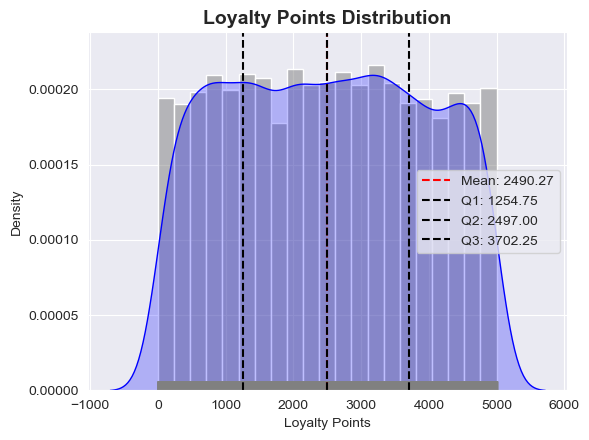

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4.5))

q1, q2, q3 = df["LoyaltyPoints"].quantile([0.25, 0.5, 0.75])
mean = df["LoyaltyPoints"].mean()

sns.histplot(data=df, x="LoyaltyPoints", stat='density', kde=False, color="gray", ax=ax, alpha=0.5)
sns.kdeplot(data=df["LoyaltyPoints"], fill=True, color="blue", ax=ax)
sns.rugplot(data=df["LoyaltyPoints"], color="gray", ax=ax)

ax.axvline(mean, linestyle="--", color="red", label=f"Mean: {mean:.2f}")
ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

ax.set_title("Loyalty Points Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Loyalty Points")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.show()

#### LoyaltyPoints:
- The mean `(2490.27)` is very close to the median `(Q2: 2497.00)`, suggesting the skew is not severe.
- There's a wide range between Q1 `(1254.75)` and Q3 `(3702.25)`, indicating considerable variation in loyalty points.
- The distribution appears to have multiple peaks, possibly representing different tiers of customer loyalty.

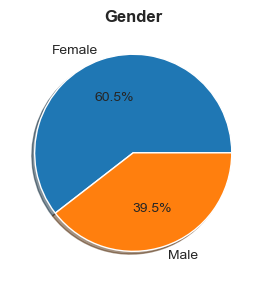

In [23]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(df["Gender"]).values(), 
        labels = Counter(df["Gender"]).keys(), 
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Gender", fontsize = 12, fontweight = "bold")
plt.show()

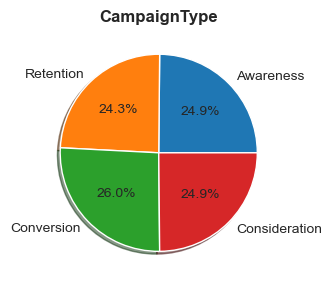

In [24]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(df["CampaignType"]).values(), 
        labels = Counter(df["CampaignType"]).keys(), 
        autopct = "%.1f%%", 
        shadow = True)
plt.title("CampaignType", fontsize = 12, fontweight = "bold")
plt.show()

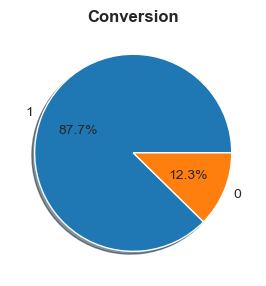

In [25]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(df["Conversion"]).values(), 
        labels = Counter(df["Conversion"]).keys(), 
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Conversion", fontsize = 12, fontweight = "bold")
plt.show()

The conversion rate of `12.3%` vs `87.7%` indicates a significant class imbalance.

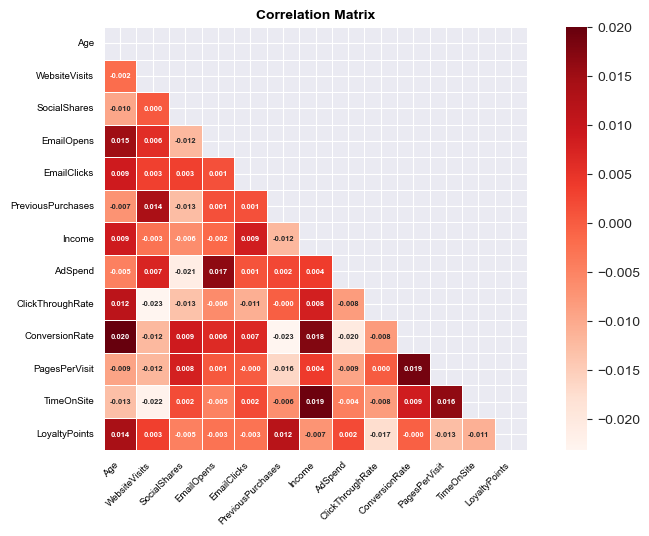

In [26]:
corr_matrix= df[discrete_variables+continuous_variables] .corr()
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype = bool))

fig,ax = plt.subplots(figsize = (10, 5.5))
sns.heatmap(corr_matrix, 
            annot = True, 
            annot_kws = {'fontsize':5.5, 'fontweight':'bold'},
            fmt = '.3f',
            linewidths = 0.6,
            cmap = 'Reds', 
            mask = mask, 
            square = True,
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.tick_params(labelsize = 7, labelcolor = 'black')
ax.set_title("Correlation Matrix", fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

## Summary of Correlation Matrix

- **General Observation**:
  - Overall, the correlations between variables are weak, with most values close to zero.

- **Notable Positive Correlations**:
  - **PagesPerVisit and TimeOnSite**: The strongest observed positive correlation (around 0.019). This may indicate that more pages visited correlate with more time spent on the site.
  - **PreviousPurchases and EmailClicks**: A slight positive correlation (around 0.012), suggesting a possible relationship between email engagement and prior purchases.

- **Negative Correlations**:
  - **Age and WebsiteVisits**: Weak negative correlation (-0.002), indicating a very slight tendency for older individuals to visit websites less frequently.

- **General Implications**:
  - The weak correlations suggest a lack of strong linear relationships between the variables. This may indicate that these features are not highly predictive of one another or that nonlinear relationships could be present.

- **Further Analysis**:
  - Additional statistical analyses or data transformations may be required to uncover more significant relationships or to better understand the dataset's structure.


In [27]:
df.head(3)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1


# 4. Data Preprocessing

In [28]:
df.drop(['AdvertisingPlatform','AdvertisingTool'], axis = 1, inplace = True)

In [29]:
df.head(3)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1


### Steps taken:
**Numerical Features:**
  Scaled using Min-Max Scaler

**Categorical Features:**
  Using Target Encoder, converted to numerical values
  - For the case of categorical target: features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.

  - For the case of continuous target: features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.
  
**Imbalance in Dataset:**
 Handled using Sampling techniques on Training data (Not in testing data to prevent data leak.)
  - SMOTE: Oversampling technique, Generate synthetic examples by interpolating between existing examples in the minority class.
  - Undersampling the data.

In [30]:
scaler = MinMaxScaler()
cols_to_scale = ['Age','CustomerID','Income','AdSpend','ClickThroughRate','ConversionRate','WebsiteVisits','PagesPerVisit','TimeOnSite','SocialShares','EmailOpens','EmailClicks','PreviousPurchases','LoyaltyPoints']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [31]:
X = df.drop('Conversion', axis = 1)
y = df['Conversion']

SEED = 1234
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, 
                                       y, 
                                       test_size = TEST_SIZE, 
                                       random_state = SEED, 
                                       stratify = y)

print(f"X_train: {len(y_train)} samples")
print(f"X_test: {len(y_test)} samples")

X_train: 6400 samples
X_test: 1600 samples


In [32]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 5610, 0: 790})
Counter({1: 1402, 0: 198})


In [33]:
categorical_features = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()
numerical_features = continuous_variables + discrete_variables

In [34]:
te = TargetEncoder()

transformers = [('te', te, categorical_features)]

preprocessor = ColumnTransformer(transformers, 
                                 remainder = 'passthrough', 
                                 verbose_feature_names_out = False)

X_train_prep = preprocessor.fit_transform(X_train, y_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep_df = pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out())
X_test_prep_df = pd.DataFrame(X_test_prep, columns=preprocessor.get_feature_names_out())

X_train_prep_df.head()

,Gender,CampaignChannel,CampaignType,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.878112,0.881408,0.865459,0.120640,0.568627,0.148201,0.988179,0.824668,0.568365,0.408163,0.246431,0.795505,0.686869,0.526316,0.777778,0.444444,0.623125
1,0.878112,0.881408,0.849092,0.186773,0.647059,0.699882,0.398291,0.254752,0.538528,0.571429,0.113322,0.898336,0.484848,0.947368,0.111111,0.666667,0.986397
2,0.878112,0.881408,0.849092,0.111264,0.980392,0.962961,0.154401,0.315727,0.264336,0.979592,0.448231,0.494776,0.878788,0.578947,1.000000,0.333333,0.657732
3,0.878112,0.872084,0.854545,0.912989,0.764706,0.715831,0.367209,0.855826,0.490784,0.877551,0.113849,0.015813,0.242424,0.631579,0.000000,0.444444,0.197039
4,0.874214,0.881408,0.934416,0.563070,0.921569,0.394346,0.326326,0.180437,0.969593,0.306122,0.161649,0.850034,0.868687,0.263158,0.333333,0.666667,0.027205


In [35]:
smote = SMOTE()
X_resampled1, y_resampled1 = smote.fit_resample(X_train_prep_df, y_train)

In [36]:
print(Counter(y_resampled1))

Counter({1: 5610, 0: 5610})


In [37]:
rus = RandomUnderSampler()
X_resampled2, y_resampled2 = rus.fit_resample(X_train_prep_df, y_train)

In [38]:
print(Counter(y_resampled2))

Counter({0: 790, 1: 790})


# 5. Model Training and Predictions (Classifiers)

In [39]:
X_train_prep_df.count(axis=1)[0]

17

#### Using Original Data(Without sampling)

In [40]:
clf1 = DecisionTreeClassifier(random_state = SEED)
clf2 = RandomForestClassifier(random_state = SEED, n_jobs = -1)
clf3 = GradientBoostingClassifier(random_state = SEED)
clf4 = XGBClassifier(random_state = SEED, n_jobs = -1)
clf5 = CatBoostClassifier(random_state = SEED, verbose = 0)

MODELS = [clf1, clf2, clf3, clf4, clf5]

for model in MODELS:
    model.fit(X_train_prep_df, y_train)
    
    y_pred_train = model.predict(X_train_prep_df)
    y_pred_test = model.predict(X_test_prep_df)
    
    print(f"{type(model).__name__} | F1 Train: {f1_score(y_train, y_pred_train):.4f} | F1 Test: {f1_score(y_test, y_pred_test):.4f}\n")

DecisionTreeClassifier | F1 Train: 1.0000 | F1 Test: 0.9256

RandomForestClassifier | F1 Train: 1.0000 | F1 Test: 0.9387

GradientBoostingClassifier | F1 Train: 0.9740 | F1 Test: 0.9515

XGBClassifier | F1 Train: 1.0000 | F1 Test: 0.9592

CatBoostClassifier | F1 Train: 0.9998 | F1 Test: 0.9642



#### Using the Over sampled data

In [41]:
for model in MODELS:
    model.fit(X_resampled1, y_resampled1)
    
    y_pred_train = model.predict(X_resampled1)
    y_pred_test = model.predict(X_test_prep_df)
    
    print(f"{type(model).__name__} | F1 Train: {f1_score(y_resampled1, y_pred_train):.4f} | F1 Test: {f1_score(y_test, y_pred_test):.4f}\n")

DecisionTreeClassifier | F1 Train: 1.0000 | F1 Test: 0.9064

RandomForestClassifier | F1 Train: 1.0000 | F1 Test: 0.9513

GradientBoostingClassifier | F1 Train: 0.9707 | F1 Test: 0.9616

XGBClassifier | F1 Train: 1.0000 | F1 Test: 0.9635

CatBoostClassifier | F1 Train: 0.9997 | F1 Test: 0.9637



#### Using Undersampled data

In [42]:
for model in MODELS:
    model.fit(X_resampled2, y_resampled2)
    
    y_pred_train = model.predict(X_resampled2)
    y_pred_test = model.predict(X_test_prep_df)
    
    print(f"{type(model).__name__} | F1 Train: {f1_score(y_resampled2, y_pred_train):.4f} | F1 Test: {f1_score(y_test, y_pred_test):.4f}\n")

DecisionTreeClassifier | F1 Train: 1.0000 | F1 Test: 0.8675

RandomForestClassifier | F1 Train: 1.0000 | F1 Test: 0.9092

GradientBoostingClassifier | F1 Train: 0.9780 | F1 Test: 0.9385

XGBClassifier | F1 Train: 1.0000 | F1 Test: 0.9371

CatBoostClassifier | F1 Train: 1.0000 | F1 Test: 0.9451



In [43]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'iterations': [100, 500, 1000],
#     'l2_leaf_reg': [1, 3, 5, 7]
# }

param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'iterations': [100, 500, 1000],
    'l2_leaf_reg': [3, 5, 7]
}

catboost = CatBoostClassifier(random_state=SEED, verbose=0)

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

grid_search.fit(X_train_prep_df, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validated F1 score: {best_score:.4f}")

# Train the final model with the best parameters
final_model = CatBoostClassifier(**best_params, random_state=SEED, verbose=0)
final_model.fit(X_train_prep_df, y_train)

# Predict and evaluate the final model
y_pred_final = final_model.predict(X_test_prep_df)
final_f1_score = f1_score(y_test, y_pred_final)
print(f"Final F1 score on the test set: {final_f1_score:.4f}")


Best parameters found: {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
Best cross-validated F1 score: 0.9696
Final F1 score on the test set: 0.9684


- Best parameters found: {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
- Best cross-validated F1 score: 0.9696
- Final F1 score on the test set: **`0.9684`**

In [44]:
param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'iterations': [500, 1000],
    'l2_leaf_reg': [3, 5, 7]
}

catboost = CatBoostClassifier(random_state=SEED, verbose=0)

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

grid_search.fit(X_resampled1, y_resampled1)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validated F1 score: {best_score:.4f}")

# Train the final model with the best parameters
final_model = CatBoostClassifier(**best_params, random_state=SEED, verbose=0)
final_model.fit(X_resampled1, y_resampled1)

# Predict and evaluate the final model
y_pred_final = final_model.predict(X_test_prep_df)
final_f1_score = f1_score(y_test, y_pred_final)
print(f"Final F1 score on the test set: {final_f1_score:.4f}")

Best parameters found: {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Best cross-validated F1 score: 0.9344
Final F1 score on the test set: 0.9617


In [45]:
model = CatBoostClassifier(depth=4, iterations=500, l2_leaf_reg=7, learning_rate=0.05, random_state=SEED, verbose=0)
model.fit(X_train_prep_df, y_train)

# Predictions and predicted probabilities
y_pred_train = model.predict(X_train_prep_df)
y_pred_prob_train = model.predict_proba(X_train_prep_df)[:, 1]
y_pred_test = model.predict(X_test_prep_df)
y_pred_prob_test = model.predict_proba(X_test_prep_df)[:, 1]

# 6. Metrics

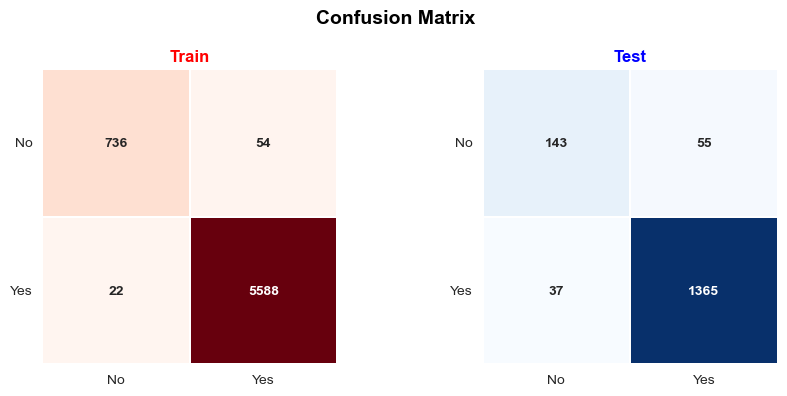

In [46]:
cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Train confusion matrix
sns.heatmap(cf_mx_train, 
            annot=True, 
            annot_kws={'fontsize':10, 'fontweight':'bold'},
            fmt='', 
            cmap='Reds', 
            cbar=False, 
            square=True, 
            linewidths=1.1, 
            yticklabels=['No', 'Yes'], 
            xticklabels=['No', 'Yes'], 
            ax=ax[0])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_title("Train", fontsize=12, fontweight='bold', color='red')

# Test confusion matrix
sns.heatmap(cf_mx_test, 
            annot=True, 
            annot_kws={'fontsize':10, 'fontweight':'bold'}, 
            fmt='', 
            cmap='Blues', 
            cbar=False, 
            square=True, 
            linewidths=1.1, 
            yticklabels=['No', 'Yes'], 
            xticklabels=['No', 'Yes'], 
            ax=ax[1])
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
ax[1].set_title("Test", fontsize=12, fontweight='bold', color='blue')

# Overall title and layout adjustment
fig.suptitle("Confusion Matrix", fontsize=14, fontweight='bold', color='black')
fig.tight_layout()
plt.show()

In [47]:
# Confusion matrix for train
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

# Confusion matrix for test
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Train Confusion Matrix:
[[ 736   54]
 [  22 5588]]

Test Confusion Matrix:
[[ 143   55]
 [  37 1365]]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [51]:

# Accuracy (extra, commonly used)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.988125
Test Accuracy : 0.9425


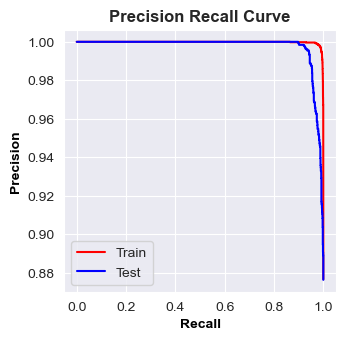

In [52]:
precision_train, recall_train, _ = precision_recall_curve(y_train, 
                                                          y_pred_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, 
                                                        y_pred_prob_test)

plt.figure(figsize = (3.5, 3.4))
plt.plot(recall_train, precision_train, color = 'red', label = 'Train')
plt.plot(recall_test, precision_test, color = 'blue', label = 'Test')
plt.xlabel("Recall", fontsize = 10, fontweight = 'bold', color = 'black')
plt.ylabel("Precision", fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Precision Recall Curve", fontsize = 12, fontweight = 'bold')
plt.legend()
plt.show()

# The End